# Modelling the language using a Generalized Linear Model

There are four parts:
1. Modelling the language of the **performances** from **1893 to 1946** for Dutch and German
2. Modelling the language of the **performances** from **1940 to 1945** for Dutch and German
3. Modelling the language of the **titles** from **1893 to 1946** for Dutch and German
4. Modelling the language of the **titles** from **1940 to 1945** for Dutch and German

I also included a comparison of performances with and without Wagner, but I did not use this for the thesis.

In [4]:
df <- read.delim('Binomial_prep1893_1946.csv', sep=',', header=TRUE)

In [5]:
library(effects)

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


In [6]:
#Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))

#Two new binary columns whether a title is Dutch (True/False) or German (True/False)
df$Dutch_Title <- as.integer(as.logical(df$Dutch_Title))
df$German_Title <- as.integer(as.logical(df$German_Title))

head(df)

ï..,Date,Original.premiere,Directors,Normalised.title,Composer,Multiple.bill,Season,Title_Language,Occasion,Production_Language,Dutch,German,Title_Language_GLM,Dutch_Title,German_Title
0,1893-10-03,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0
1,1893-10-05,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,0,1,other,0,0
2,1893-10-10,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0
3,1893-10-12,1971,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,False,1893-1894,Unk,N,German,0,1,other,0,0
4,1893-11-16,?,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,False,1893-1894,Unk,N,Dutch,1,0,other,0,0
5,1893-10-17,1821,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,False,1893-1894,NL,N,German,0,1,Dutch,1,0


In [7]:
#Make sure that columns are interpreted as (ordered) factors

df$Season <- factor(df$Season, ordered = TRUE)
df$Date <- as.factor(df$Date)
df$Composer <- as.factor(df$Composer)
df$Normalised.title <- as.factor(df$Normalised.title)
df$Original.premiere <- as.factor(df$Original.premiere)
df$Multiple.bill <- as.factor(df$Multiple.bill) 
df$Occasion <- as.factor(df$Occasion)
df$Dutch <- as.factor(df$Dutch)
df$German <- as.factor(df$German)

df$Dutch_Title <- as.factor(df$Dutch_Title) #Titles in Dutch
df$German_Title <- as.factor(df$German_Title) # Titles in German

df$Production_Language <- as.factor(df$Production_Language) # Column with the language of the work (Dutch/German/other)
df$Title_Language_GLM <- as.factor(df$Title_Language_GLM) # Column with the language of the titles (Dutch/German/other)
df$Directors <- as.factor(df$Directors)
df$Directors <- factor(df$Directors, ordered = TRUE)

In [8]:
str(df)
#check if all columns are formatted correctly

'data.frame':	6767 obs. of  16 variables:
 $ ï..                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date               : Factor w/ 4949 levels "1893-10-03","1893-10-05",..: 1 2 3 4 14 5 6 7 8 9 ...
 $ Original.premiere  : Factor w/ 131 levels "","?","1608",..: 21 129 21 129 2 21 2 21 2 21 ...
 $ Directors          : Ord.factor w/ 10 levels "August L. Baeyens"<..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Normalised.title   : Factor w/ 419 levels "'T Minnebrugje",..: 149 409 149 409 38 149 38 149 38 149 ...
 $ Composer           : Factor w/ 251 levels "","?","Ã‰douard Lalo",..: 44 47 44 47 212 44 212 44 212 44 ...
 $ Multiple.bill      : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season             : Ord.factor w/ 50 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Title_Language     : Factor w/ 6 levels "","DUI","FR",..: 5 6 5 6 6 5 6 5 6 5 ...
 $ Occasion           : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 ...
 $ Production_Language: Factor w/ 3 levels "Dutc

# Part 1: performances 1893-1946

Deze code is van Mona Allaert overgenomen en toegepast op de gehele dataset.

In [9]:
m1 <- glm(Dutch ~ Season + Occasion + Directors + Multiple.bill + Original.premiere, data = df, family = binomial)

drop1(m1)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,42819.860,43195.860
Season,45,2140.151,2426.151
Occasion,2,39864.281,40236.281
Directors,5,1918.291,2284.291
Multiple.bill,1,39071.320,39445.320
Original.premiere,130,5191.729,5307.729


In [10]:
x = c('1893-1894','1894-1895', '1895-1896', '1896-1897', '1897-1898', 
'1898-1899', '1899-1900', '1900-1901', '1901-1902', '1902-1903', '1903-1904', 
'1904-1905', '1905-1906', '1906-1907', '1907-1908', '1908-1909', '1909-1910', 
'1910-1911', '1911-1912', '1912-1913', '1913-1914', '1914-1915', '1915-1916', '1916-1917', '1917-1918', 
'1918-1919', '1919-1920', '1920-1921', '1921-1922', '1922-1923', '1923-1924', '1924-1925', '1925-1926',
'1926-1927', '1927-1928', '1928-1929', '1929-1930', '1930-1931', '1931-1932', '1932-1933', '1933-1934',
'1934-1935', '1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', 
'1943-1944', '1944-1945', '1945-1946', '2099-2100')

break_points <- c('1914-1915', '1915-1916', '1916-1917', '1917-1918')

In [11]:
#new model containing only the relevant predictors
model_NL <- glm(Dutch ~ Multiple.bill + Season, data = df, family = binomial)

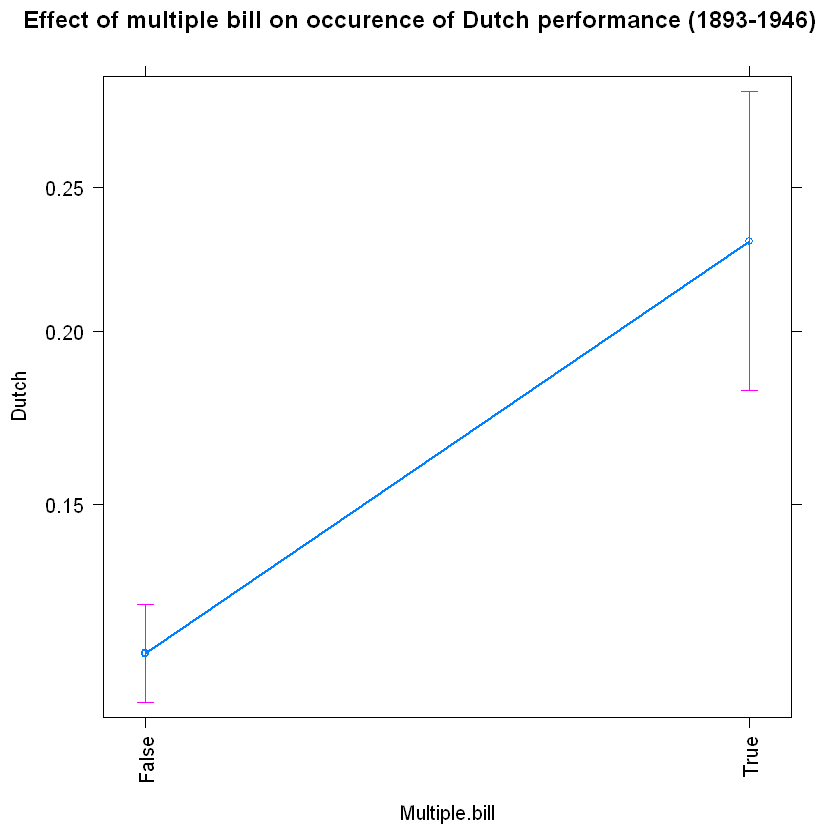

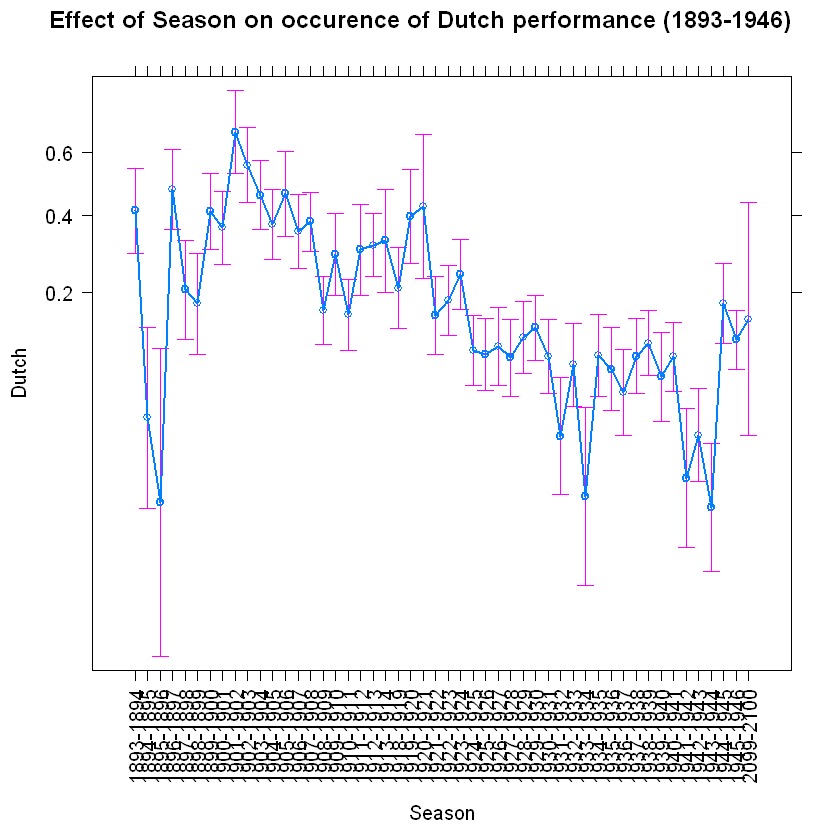

In [12]:
# Plots: effect of Multiple Bill and Season on the occurence of Dutch performances 1893-1946
plot(effect("Multiple.bill", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of Dutch performance (1893-1946)')

plot(effect("Season", model_NL),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of Dutch performance (1893-1946)')

In [13]:
#we do the same for German
m2 <- glm(German ~ Season + Occasion + Multiple.bill + Directors + Original.premiere, data = df, family = binomial)
drop1(m2)

# The model
model_GER <- glm(German ~ Season + Multiple.bill, data = df, family = binomial)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,17198.481,17574.481
Season,45,3168.905,3454.905
Occasion,2,2873.181,3245.181
Multiple.bill,1,2981.848,3355.848
Directors,5,2865.144,3231.144
Original.premiere,130,8364.590,8480.590


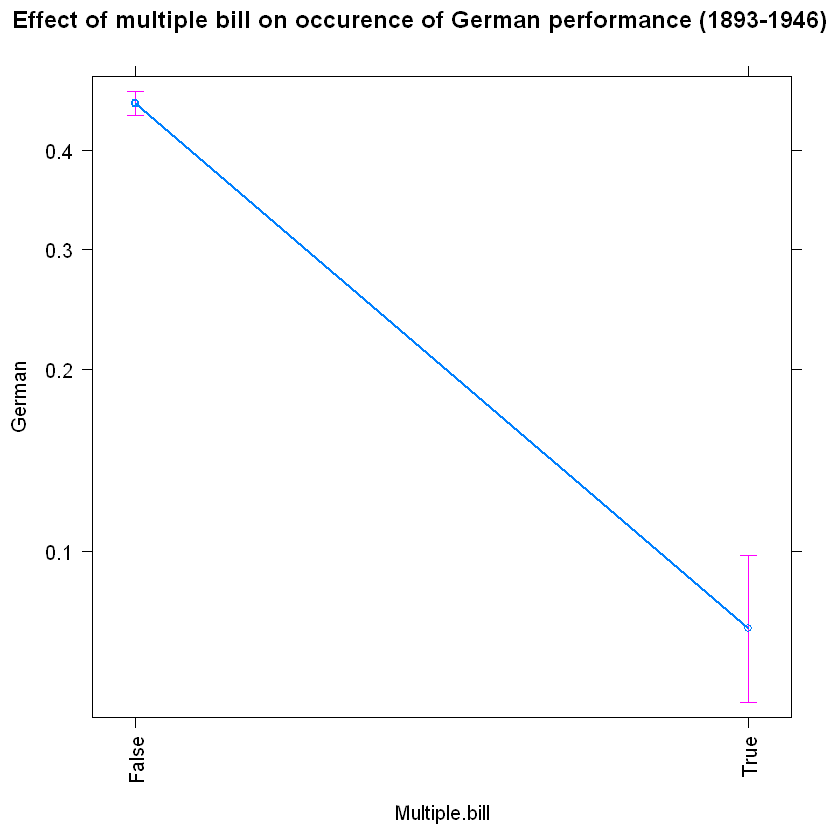

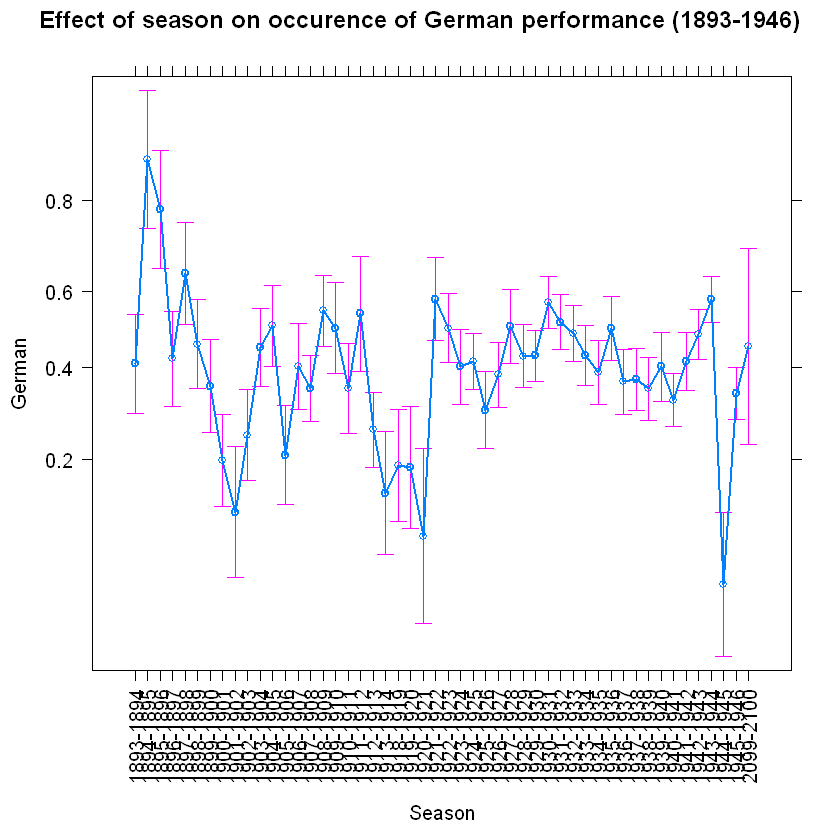

In [14]:
# Plots: effect of Multiple Bill and Season on the occurence of German performances 1893-1946

plot(effect("Multiple.bill", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of German performance (1893-1946)')

plot(effect("Season", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of German performance (1893-1946)')

# Part 2: Performances 1940-1945

In [15]:
# Select the Seasons 1940-1941 to 1945-1946
df_subset <- df[df$Season >= "1940-1941" & df$Season <= "1944-1945", ]

### Note to self: zelfde code toegepast op subset

In [16]:
m1sub <- glm(Dutch ~ Season + Occasion + Directors + Multiple.bill + Original.premiere, data = df_subset, family = binomial)

drop1(m1sub)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,28.84120,164.8412
Season,2,67.18655,199.1866
Occasion,1,28.84120,162.8412
Directors,0,28.84120,164.8412
Multiple.bill,1,46.24094,180.2409
Original.premiere,61,437.67220,451.6722


In [17]:
x = c('1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '2099-2100')

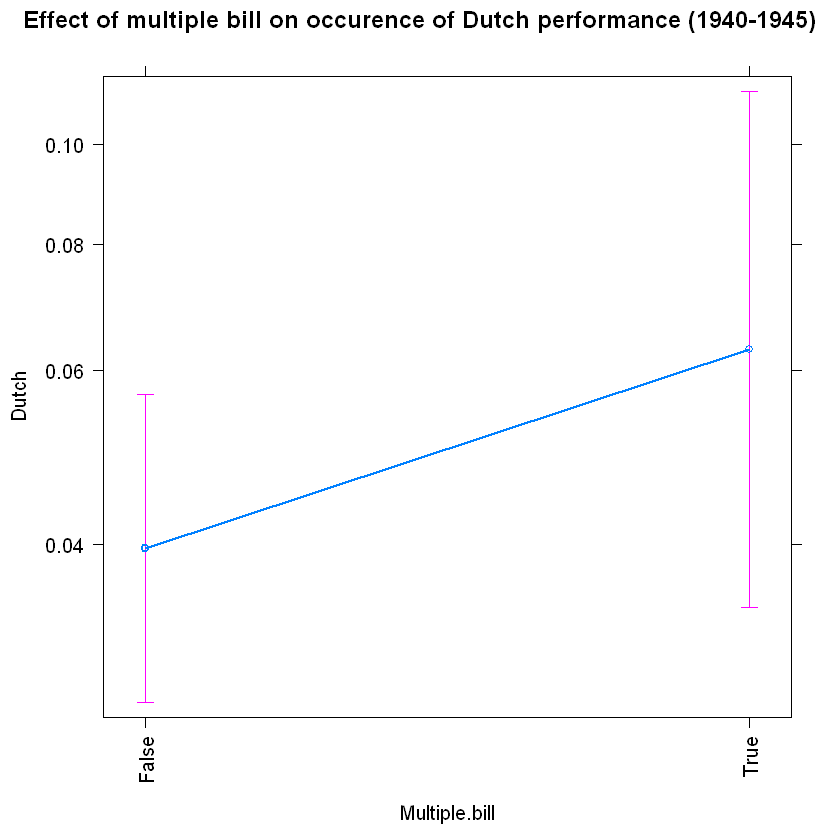

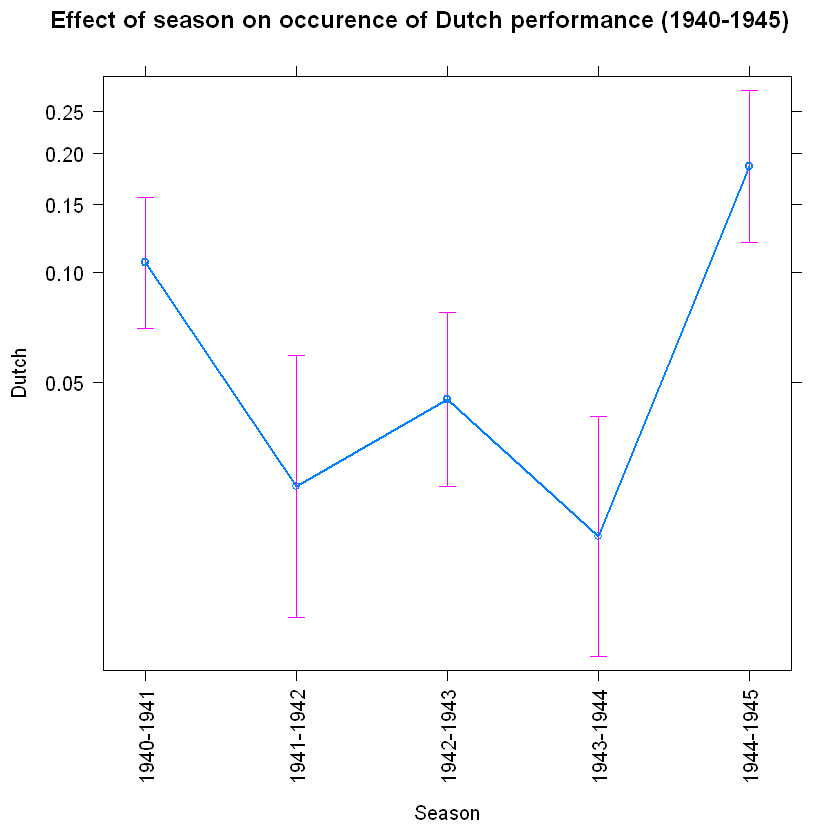

In [18]:
#new model containing only the relevant predictors
model_NL <- glm(Dutch ~ Multiple.bill + Season, data = df_subset, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch performances 1940-1945
plot(effect("Multiple.bill", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of Dutch performance (1940-1945)')

plot(effect("Season", model_NL), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of Dutch performance (1940-1945)')

In [19]:
#we do the same for German
m2sub <- glm(German ~ Season + Occasion + Multiple.bill + Directors + Original.premiere, data = df_subset, family = binomial)
drop1(m2sub)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,14.39526,150.3953
Season,2,20.70338,152.7034
Occasion,1,14.39526,148.3953
Multiple.bill,1,56.02376,190.0238
Directors,0,14.39526,150.3953
Original.premiere,61,1108.94733,1122.9473


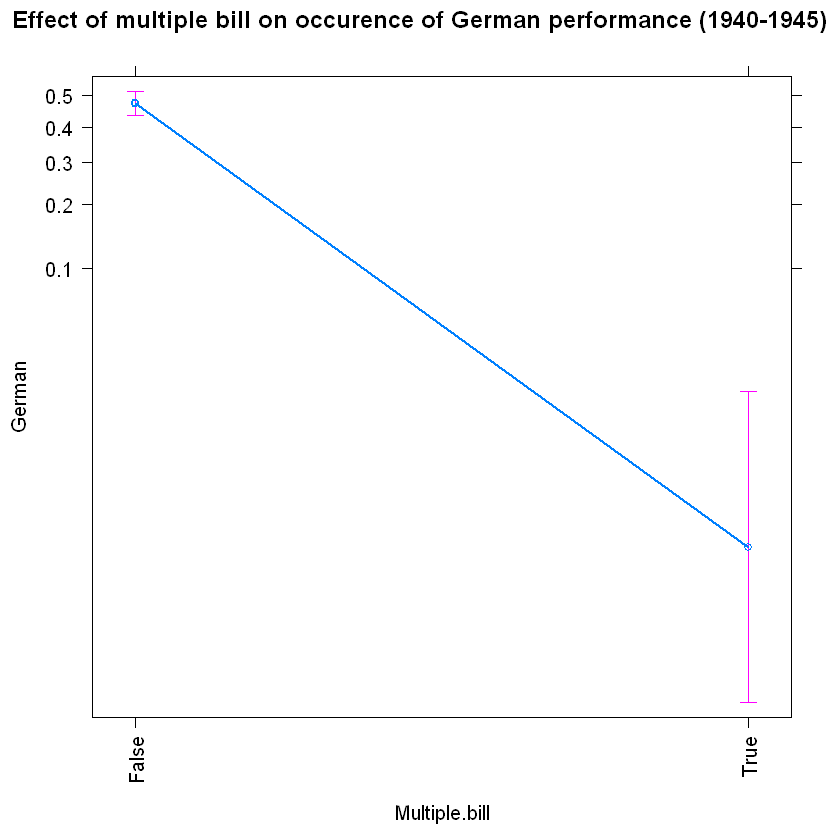

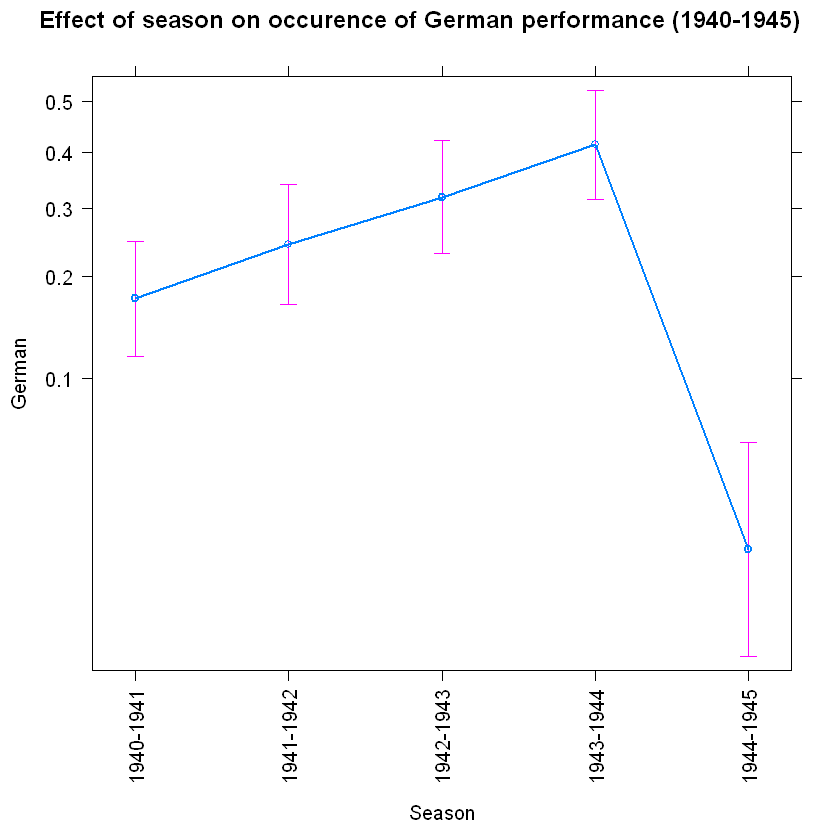

In [20]:
model_GER <- glm(German ~ Season + Multiple.bill, data = df_subset, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German performances 1940-1945
plot(effect("Multiple.bill", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of multiple bill on occurence of German performance (1940-1945)')

plot(effect("Season", model_GER), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of German performance (1940-1945)')


# Part 3: Title language 1893-1946

In [22]:
m3 <- glm(Dutch_Title ~ Season + Occasion + Directors + Multiple.bill + Original.premiere, data = df, family = binomial)

drop1(m3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,3031.886,3407.886
Season,45,3239.272,3525.272
Occasion,2,3041.116,3413.116
Directors,5,3040.292,3406.292
Multiple.bill,1,3043.364,3417.364
Original.premiere,130,8818.612,8934.612


In [23]:
x = c('1893-1894','1894-1895', '1895-1896', '1896-1897', '1897-1898', 
'1898-1899', '1899-1900', '1900-1901', '1901-1902', '1902-1903', '1903-1904', 
'1904-1905', '1905-1906', '1906-1907', '1907-1908', '1908-1909', '1909-1910', 
'1910-1911', '1911-1912', '1912-1913', '1913-1914', '1914-1915', '1915-1916', '1916-1917', '1917-1918', 
'1918-1919', '1919-1920', '1920-1921', '1921-1922', '1922-1923', '1923-1924', '1924-1925', '1925-1926',
'1926-1927', '1927-1928', '1928-1929', '1929-1930', '1930-1931', '1931-1932', '1932-1933', '1933-1934',
'1934-1935', '1935-1936', '1936-1937', '1937-1938', '1938-1939', '1939-1940', '1940-1941', '1941-1942', '1942-1943', 
'1943-1944', '1944-1945', '1945-1946', '2099-2100')

break_points <- c('1914-1915', '1915-1916', '1916-1917', '1917-1918')

# Note: December 14, 1944 tot April 21, 1945 toevoegen? Want opera was dicht?

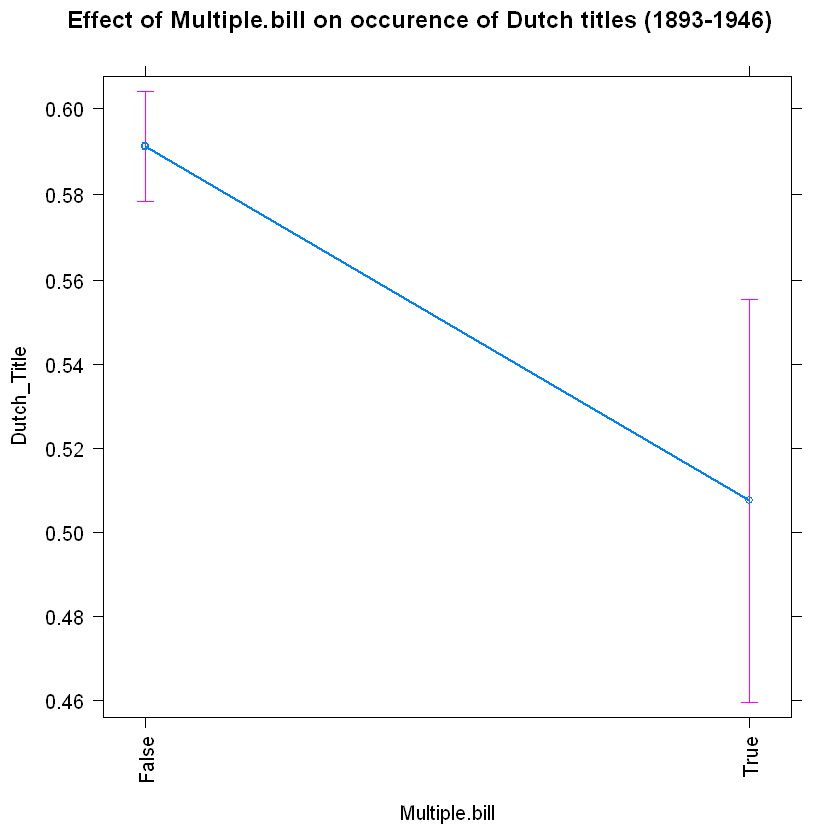

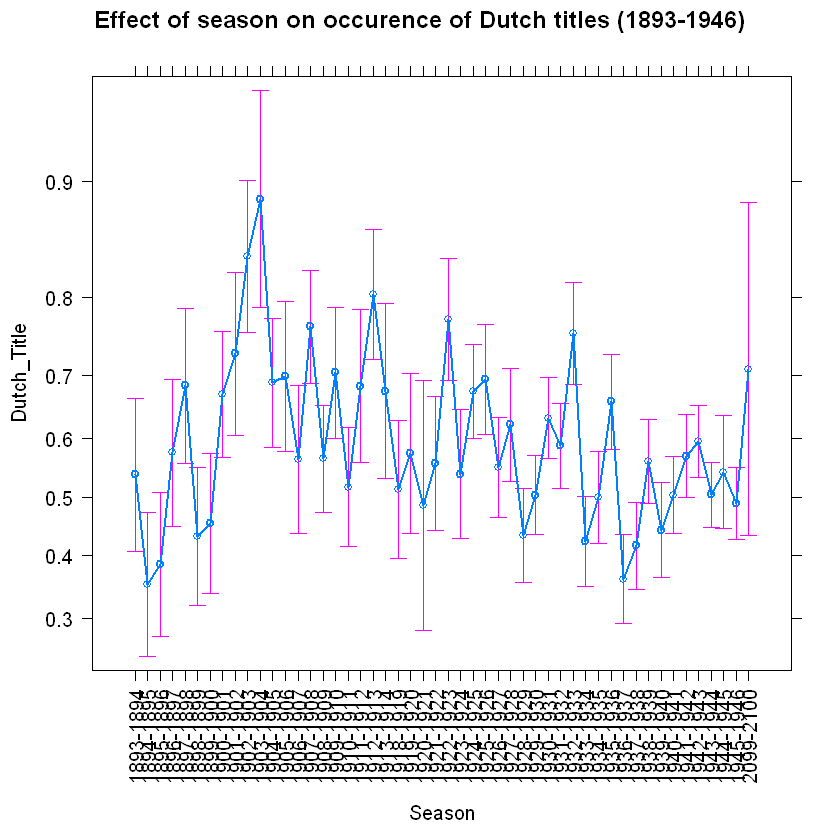

In [24]:
#new model containing only the relevant predictors
model_NL2 <- glm(Dutch_Title ~ Multiple.bill + Season, data = df, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch titles 1893-1946
plot(effect("Multiple.bill", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple.bill on occurence of Dutch titles (1893-1946)')

plot(effect("Season", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of Dutch titles (1893-1946)')

In [25]:
#we do the same for German
m4 <- glm(German_Title ~ Season + Occasion + Multiple.bill + Directors + Original.premiere, data = df, family = binomial)
drop1(m4)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,15498.77096,15874.7710
Season,45,91.52609,377.5261
Occasion,2,2955.57958,3327.5796
Multiple.bill,1,576.69845,950.6985
Directors,5,36.57655,402.5765
Original.premiere,130,665.79948,781.7995


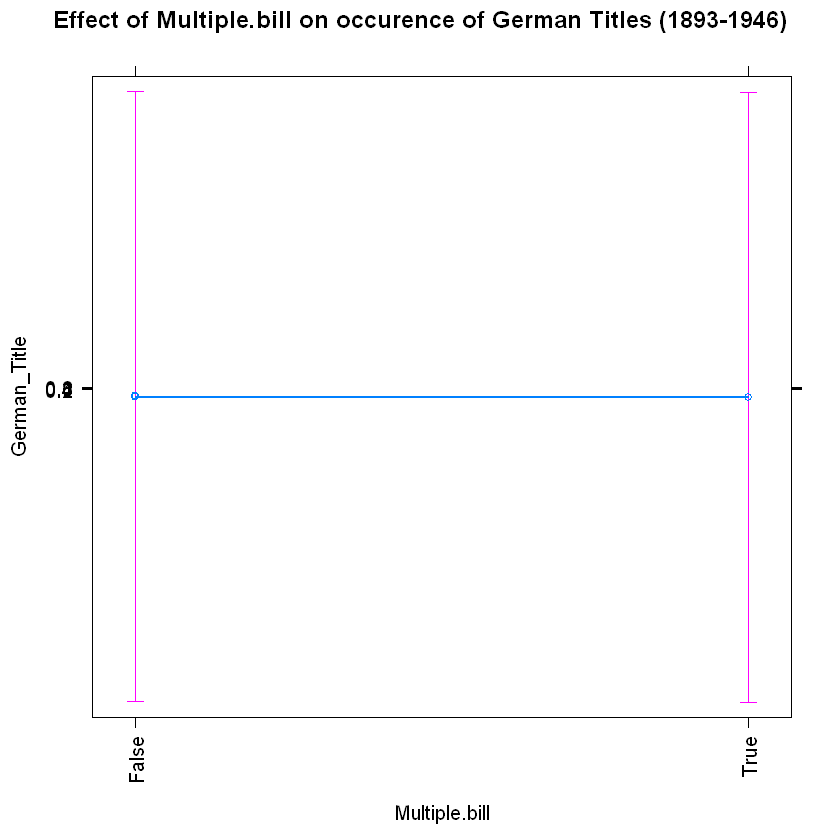

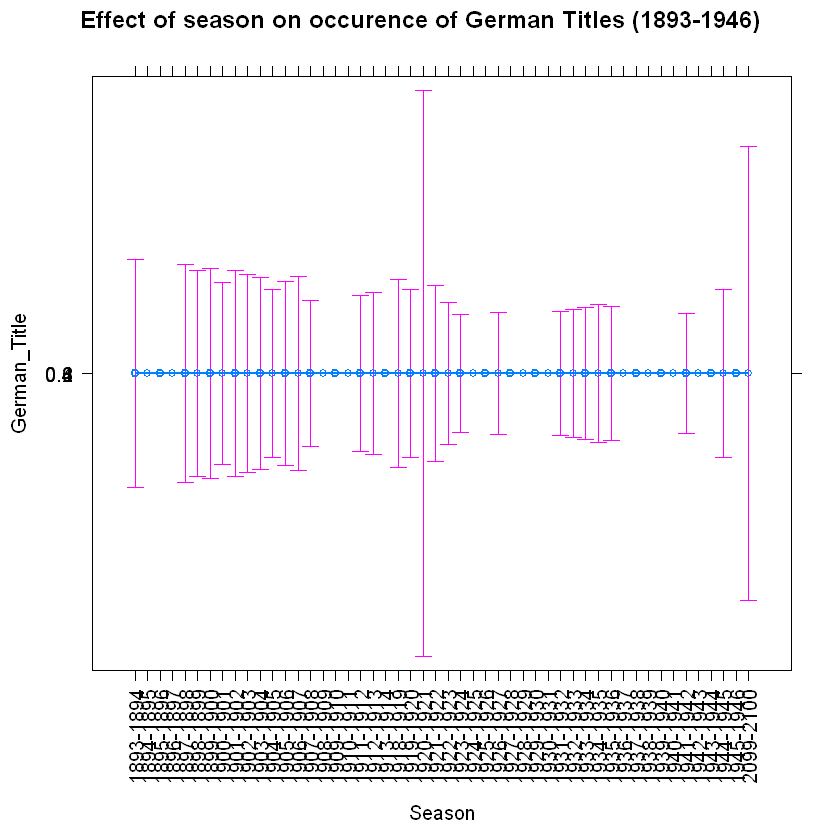

In [26]:
model_GER2 <- glm(German_Title ~ Season + Multiple.bill, data = df, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German titles 1893-1946
plot(effect("Multiple.bill", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple.bill on occurence of German Titles (1893-1946)')

plot(effect("Season", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of German Titles (1893-1946)')

# Part 4: Title language 1940-1945

In [27]:
# Select the Seasons 1940-1941 to 1945-1946
df_lang <- df[df$Season >= "1940-1941" & df$Season <= "1944-1945", ]

In [28]:
m4 <- glm(Dutch_Title ~ Season + Occasion + Directors + Multiple.bill + Original.premiere, data = df_lang, family = binomial)

drop1(m4)

,Df,Deviance,AIC
<none>,NA,150.7669,286.7669
Season,2,153.8570,285.8570
Occasion,1,150.7669,284.7669
Directors,0,150.7669,286.7669
Multiple.bill,1,156.3621,290.3621
Original.premiere,61,1441.6850,1455.6850


In [29]:
x = c('1940-1941', '1941-1942', '1942-1943', '1943-1944', '1944-1945', '1945-1946', '2099-2100')

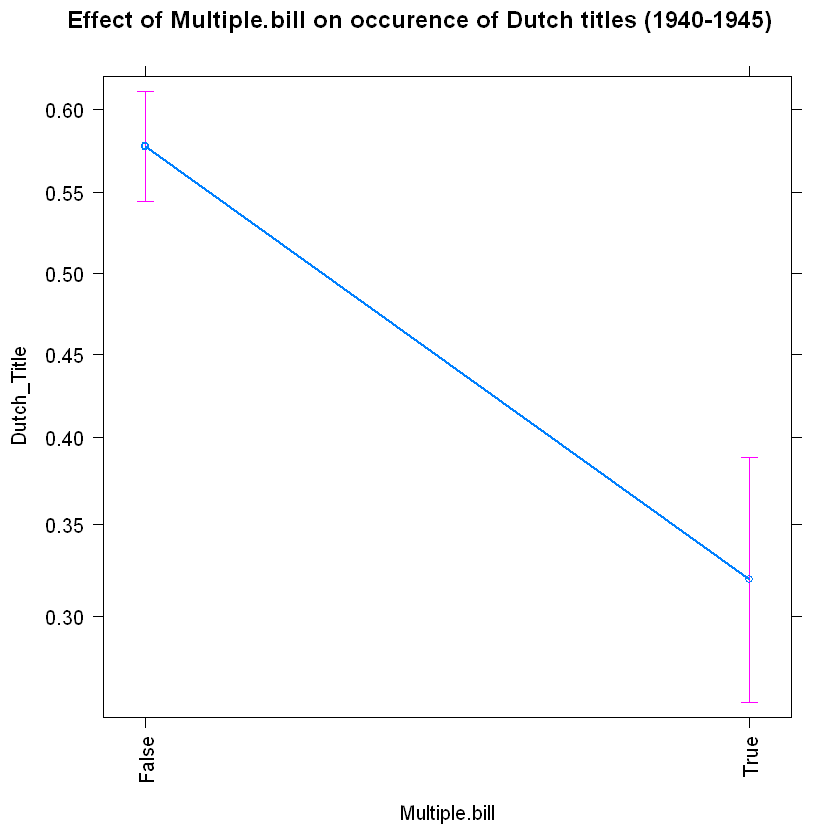

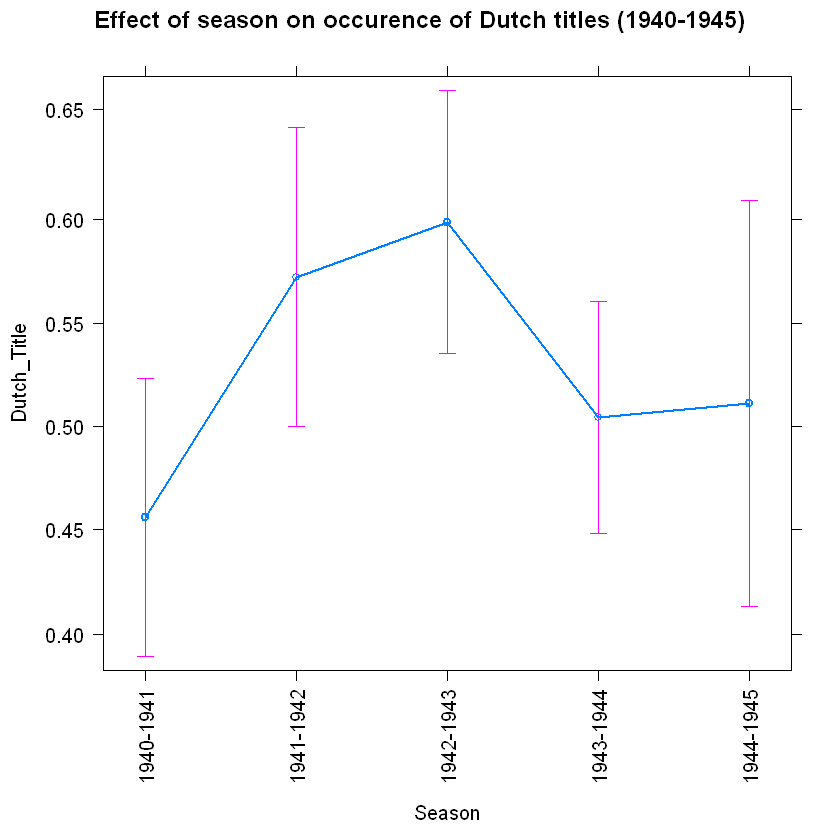

In [30]:
model_NL2 <- glm(Dutch_Title ~ Multiple.bill + Season, data = df_lang, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of Dutch titles 1940-1945
plot(effect("Multiple.bill", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple.bill on occurence of Dutch titles (1940-1945)')

plot(effect("Season", model_NL2), x,
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on occurence of Dutch titles (1940-1945)')

In [31]:
#we do the same for German
m4 <- glm(German_Title ~ Season + Occasion + Multiple.bill + Directors + Original.premiere, data = df_lang, family = binomial)
drop1(m4)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,AIC
<none>,NA,11.85974,147.85974
Season,2,13.99764,145.99764
Occasion,1,11.85974,145.85974
Multiple.bill,1,11.85974,145.85974
Directors,0,11.85974,147.85974
Original.premiere,61,77.73422,91.73422


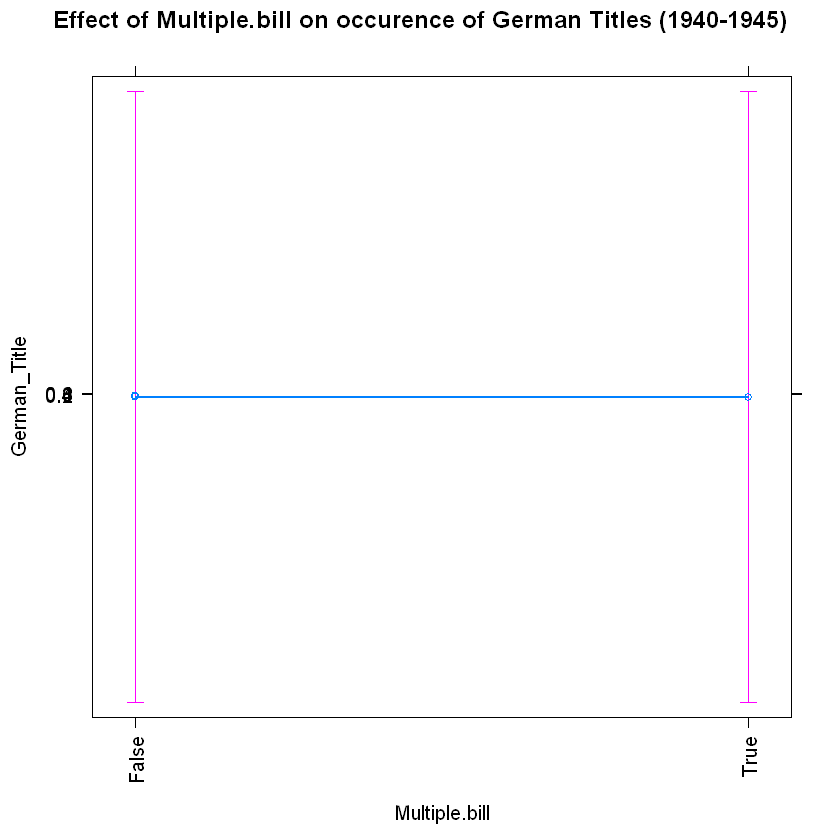

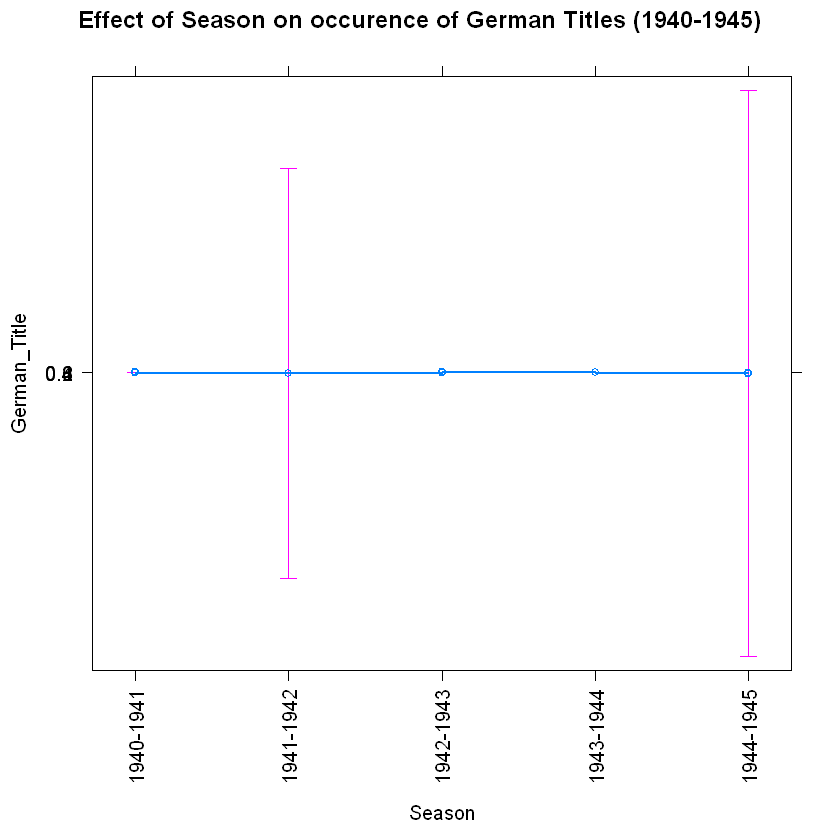

In [32]:
model_GER2 <- glm(German_Title ~ Season + Multiple.bill, data = df_lang, family = binomial)

# Plots: effect of Multiple Bill and Season on the occurence of German titles 1940-1945

plot(effect("Multiple.bill", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Multiple.bill on occurence of German Titles (1940-1945)')

plot(effect("Season", model_GER2), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on occurence of German Titles (1940-1945)')

## What happens when we delete Wagner from the dataset?
[NOTE] Not used in thesis

[1] 6767
[1] 5861
'data.frame':	5861 obs. of  16 variables:
 $ ï..                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date               : Factor w/ 4949 levels "1893-10-03","1893-10-05",..: 1 2 3 4 14 5 6 7 8 9 ...
 $ Original.premiere  : Factor w/ 131 levels "","?","1608",..: 21 129 21 129 2 21 2 21 2 21 ...
 $ Directors          : Ord.factor w/ 10 levels "August L. Baeyens"<..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Normalised.title   : Factor w/ 419 levels "'T Minnebrugje",..: 149 409 149 409 38 149 38 149 38 149 ...
 $ Composer           : Factor w/ 251 levels "","?","Ã‰douard Lalo",..: 44 47 44 47 212 44 212 44 212 44 ...
 $ Multiple.bill      : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season             : Ord.factor w/ 50 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Title_Language     : Factor w/ 6 levels "","DUI","FR",..: 5 6 5 6 6 5 6 5 6 5 ...
 $ Occasion           : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 ...
 $ Production_Language: Factor

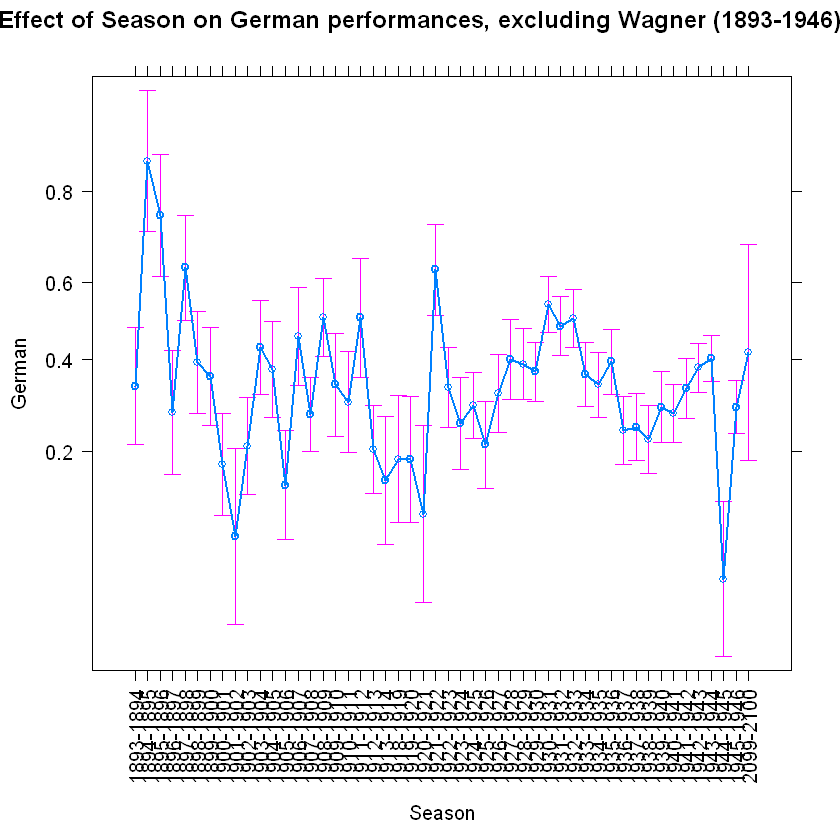

In [33]:
#remove all rows that contain Wagner in the 'Composer column'
df2 <- df[!grepl("Wagner", df$Composer), ]
print(nrow(df))
print(nrow(df2))

#Make sure that columns are interpreted as factors
df2$Season <- factor(df2$Season, ordered = TRUE)
df2$Date <- as.factor(df2$Date)
df2$Composer <- as.factor(df2$Composer)
df2$Normalised.title <- as.factor(df2$Normalised.title)
df2$Original.premiere <- as.factor(df2$Original.premiere)
df2$Occasion <- as.factor(df2$Occasion)
df2$Dutch <- as.factor(df2$Dutch)
df2$German <- as.factor(df2$German)
df2$Production_Language <- as.factor(df2$Production_Language)
df2$Directors <- factor(df2$Directors)
str(df2)

nowag <- glm(German ~ Season, data = df2, family = binomial)

plot(effect("Season", nowag),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on German performances, excluding Wagner (1893-1946)')

,Df,Deviance,AIC
<none>,NA,6807.924,6913.924
Season,49,7260.193,7268.193
Occasion,2,6816.835,6918.835
Multiple.bill,1,7031.577,7135.577


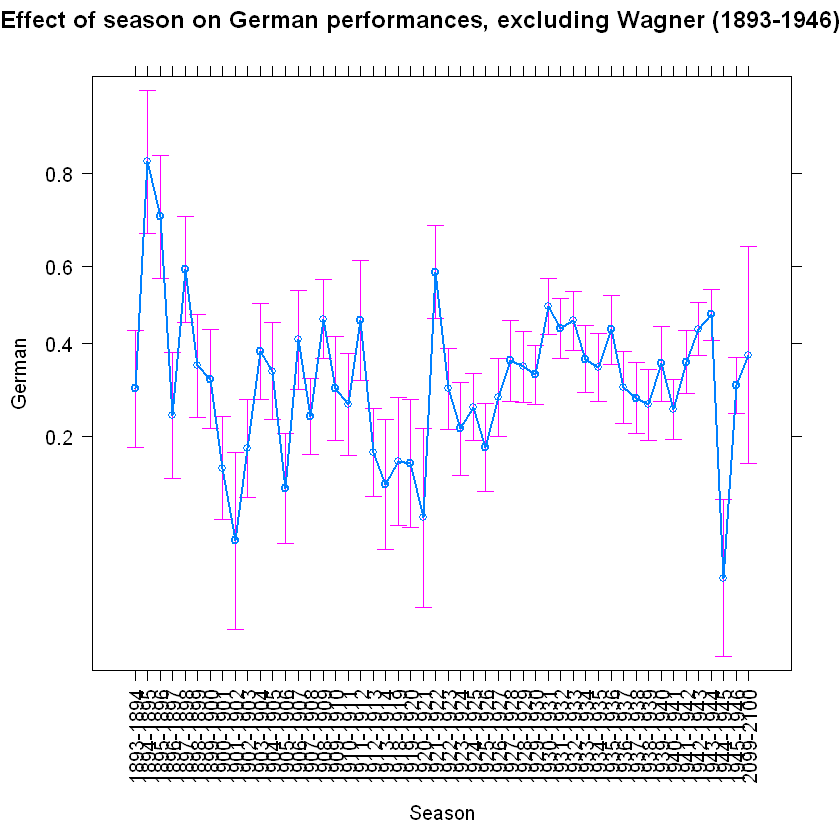

In [34]:
model_Ger_nowag <- glm(German ~Season + Occasion + Multiple.bill, data = df2, family = binomial)
drop1(model_Ger_nowag)

model_Ger_nowag <- glm(German ~Season + Multiple.bill, data = df2, family = binomial)

plot(effect("Season", model_Ger_nowag), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on German performances, excluding Wagner (1893-1946)')

#### What happens when we delete Wagner 1940-1945?

[1] 1079
[1] 969
'data.frame':	969 obs. of  16 variables:
 $ ï..                : int  5442 5443 5444 5445 5446 5447 5449 5450 5451 5452 ...
 $ Date               : Factor w/ 4949 levels "1893-10-03","1893-10-05",..: 4060 4061 4062 4063 4063 4064 4066 4066 4068 4069 ...
 $ Original.premiere  : Factor w/ 131 levels "","?","1608",..: 58 107 47 107 58 47 47 107 58 12 ...
 $ Directors          : Ord.factor w/ 3 levels "August L. Baeyens"<..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Normalised.title   : Factor w/ 419 levels "'T Minnebrugje",..: 7 222 185 222 7 185 185 222 7 129 ...
 $ Composer           : Factor w/ 251 levels "","?","Ã‰douard Lalo",..: 118 101 50 101 118 50 50 101 118 249 ...
 $ Multiple.bill      : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ Season             : Ord.factor w/ 5 levels "1940-1941"<"1941-1942"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Title_Language     : Factor w/ 6 levels "","DUI","FR",..: 6 5 6 5 6 6 6 5 6 5 ...
 $ Occasion           : Factor w/ 3 levels "G","N"

,Df,Deviance,AIC
<none>,NA,958.3613,972.3613
Season,4,1052.4172,1058.4172
Occasion,1,958.4939,970.4939
Multiple.bill,1,1164.2487,1176.2487


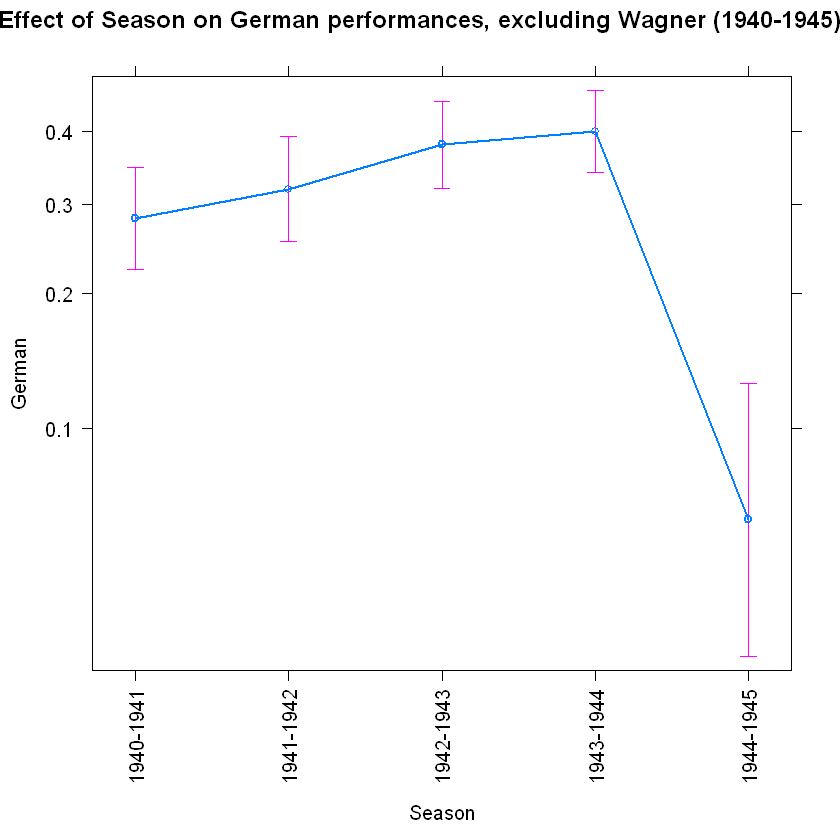

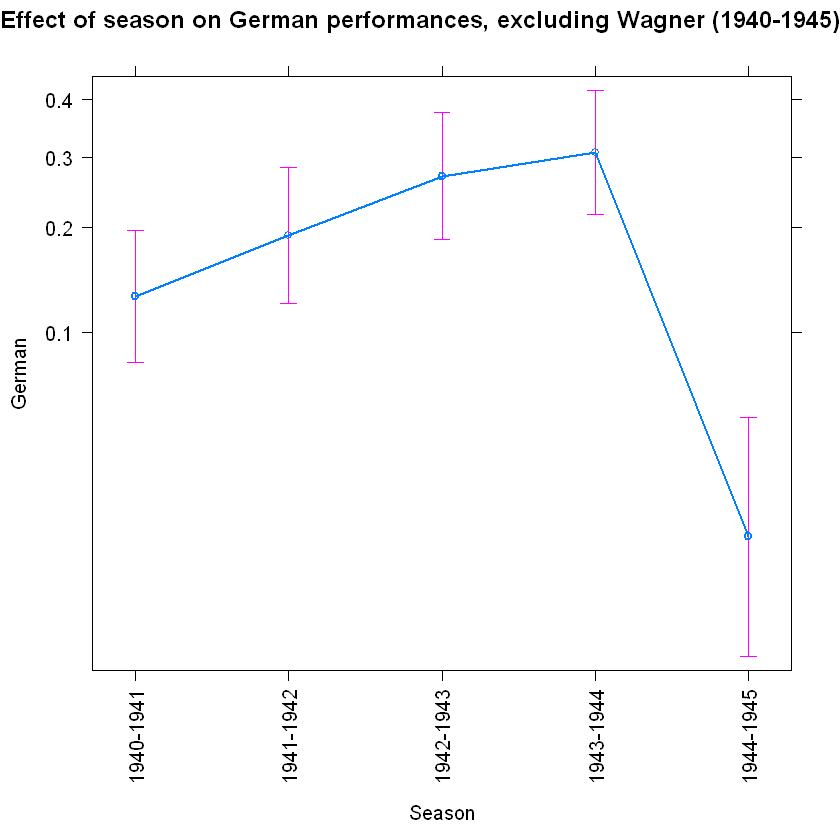

In [35]:
#remove all rows that contain Wagner in the 'Composer column'
df_subset2 <- df_subset[!grepl("Wagner", df_subset$Composer), ]
print(nrow(df_subset))
print(nrow(df_subset2))

#Make sure that columns are interpreted as factors
df_subset2$Season <- factor(df_subset2$Season, ordered = TRUE)
df_subset2$Date <- as.factor(df_subset2$Date)
df_subset2$Composer <- as.factor(df_subset2$Composer)
df_subset2$Normalised.title <- as.factor(df_subset2$Normalised.title)
df_subset2$Original.premiere <- as.factor(df_subset2$Original.premiere)
df_subset2$Occasion <- as.factor(df_subset2$Occasion)
df_subset2$Dutch <- as.factor(df_subset2$Dutch)
df_subset2$German <- as.factor(df_subset2$German)

df_subset2$Production_Language <- as.factor(df_subset2$Production_Language)
df_subset2$Directors <- factor(df_subset2$Directors)

str(df_subset2)

nowag <- glm(German ~ Season, data = df_subset2, family = binomial)


plot(effect("Season", nowag),
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of Season on German performances, excluding Wagner (1940-1945)')

model_Ger_nowag <- glm(German ~Season + Occasion + Multiple.bill, data = df_subset2, family = binomial)
drop1(model_Ger_nowag)

model_Ger_nowag <- glm(German ~Season + Multiple.bill, data = df_subset2, family = binomial)

plot(effect("Season", model_Ger_nowag), 
     symbols = list(pch = 1, cex = 0.8), 
     lines = list(lty = 1, lwd = c(2, 1)), 
     axes = list(x = list(rotate = 90)), main = 'Effect of season on German performances, excluding Wagner (1940-1945)')